# KMEANS

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]
[[-1.70639178  2.9104771 ]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]]
Accuracy score: 0.0
[2, 3, 1, 0]
Accuracy Score:  0.99


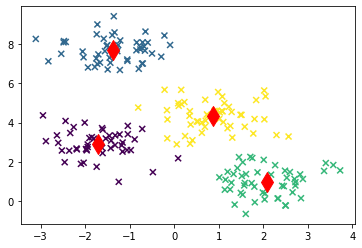

In [1]:
#Ejemplo simple
import numpy as np
import matplotlib.pyplot as pit

#Generacion de datos sinteticos
from sklearn.datasets import make_blobs
x,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print (x[:10], y[:10])
#pit.scatter (x[:,0],x[:,1])

from sklearn.cluster import KMeans
modelo = KMeans (4)
modelo.fit(x)
print(modelo.cluster_centers_)
pit.scatter(x[:,0],x[:,1], c=modelo.labels_,marker="x")
pit.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], s=200, marker="d", color="red")

#Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, modelo.labels_)
print("Accuracy score:", acc)

#Funcion para encontrar la etiqueta mas comun
import scipy
def encuentraEtiqueta(numClusters, etiqReal, etiquetas):
  permutacion = []
  for i in range (numClusters):
    idx = etiquetas == i
    nuevaEtiq = scipy.stats.mode (etiqReal[idx])[0][0] #Selecciona el mas comun
    permutacion.append (nuevaEtiq)
  return (permutacion)

permutacion = encuentraEtiqueta(4,y,modelo.labels_)
print(permutacion)
nuevasEtiq = [permutacion[etiq] for etiq in modelo.labels_]
print("Accuracy Score: ", accuracy_score(y,nuevasEtiq))

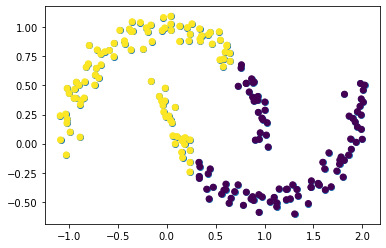

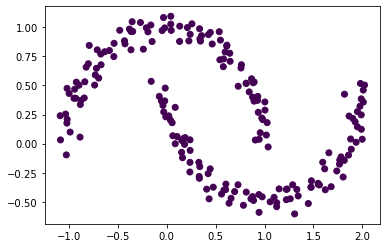

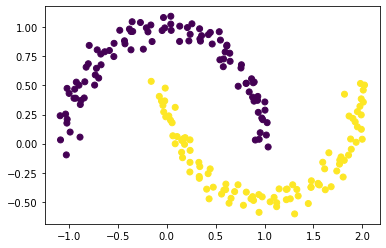

In [2]:
#Otro Ejemplo
from sklearn.datasets import make_moons
x,y = make_moons(200, noise=0.06, random_state=0)
pit.scatter(x[:,0], x[:,1])
modeloC = KMeans(2)
modeloC.fit(x)
pit.scatter(x[:,0], x[:,1], c=modeloC.labels_)
pit.show()
from sklearn.cluster import DBSCAN
modeloDBScan = DBSCAN(eps=0.3)
modeloDBScan.fit(x)
pit.scatter(x[:,0], x[:,1], c=modeloDBScan.labels_)
pit.show()
from sklearn.cluster import DBSCAN
modeloDBScan = DBSCAN(eps=0.25)
modeloDBScan.fit(x)
pit.scatter(x[:,0], x[:,1], c=modeloDBScan.labels_)
pit.show()

[4, 3, 1, 2, 9, 0, 7, 6, 5, 8]
Accurancy Score: 0.7952142459654981


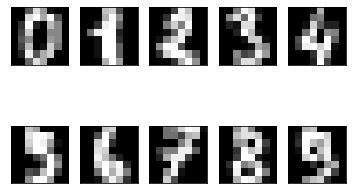

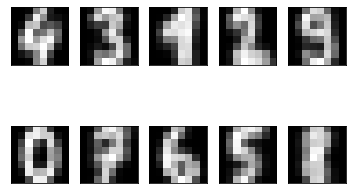

In [3]:
from sklearn.datasets import load_digits
digitos = load_digits ()
digitos.data.shape
fig, axes = pit.subplots(2, 5,subplot_kw=dict(xticks=[], yticks=[]))
for ax, dig in zip(axes.flat, digitos.data[:10]):
  ax.imshow(dig.reshape(8,8), cmap="gray")
modeloD = KMeans(n_clusters=10, random_state=0)
modeloD.fit(digitos.data)
modeloD.cluster_centers_.shape
fig, axes = pit.subplots(2, 5,subplot_kw=dict(xticks=[], yticks=[]))
for ax, dig in zip(axes.flat, modeloD.cluster_centers_):
  ax.imshow(dig.reshape(8,8), cmap="gray")
permutacion = encuentraEtiqueta(10, digitos.target,modeloD.labels_)
print(permutacion)
acc = accuracy_score(digitos.target, [permutacion[etiq] for etiq in modeloD.labels_])
print("Accurancy Score:", acc)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]
Accuracy score: 0.37333333333333335
[2, 0, 1]
Accurancy Score: 0.8933333333333333


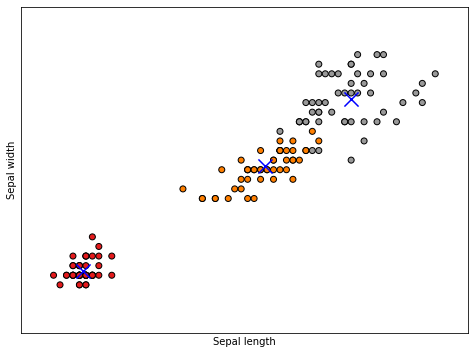

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris ()
print(iris.data.shape)
x = iris.data[:10, :4] 
print(x)
X = iris.data[:, 2:4]  
y = iris.target
Xm = np.array(X)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

modelo = KMeans (3)
modelo.fit(Xm)
print(modelo.cluster_centers_)

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
pit.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], s=200, marker="x", color="blue")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
irisD = KMeans(n_clusters=3, random_state=0)
irisD.fit(iris.data)
irisD.cluster_centers_.shape
#Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, modelo.labels_)
print("Accuracy score:", acc)
permutacion = encuentraEtiqueta(3, iris.target,irisD.labels_)
print(permutacion)
acc = accuracy_score(iris.target, [permutacion[etiq] for etiq in irisD.labels_])
print("Accurancy Score:", acc)